In [3]:
cd instances

e:\Documentos\Universidad\Imperial\ISO\Code repos\instances


In [47]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def obtain_values(filename, keyword):
    df = pd.read_json(filename, lines=True)
    return df[keyword].values.tolist()

def plot_distribution(filenames, keyword):
    p_value = (keyword == "p_value")
    # We plot the cumulative distribution of the values for each file
    values = []
    for filename in filenames:
        v = obtain_values(filename, keyword)
        v.sort()
        values.append(v)
    n = len(values[0])
    # Add legend for each file
    plt.figure(figsize=(7, 4))
    plt.rc('axes', labelsize=12)
    for i, filename in enumerate(filenames):
        plt.plot(values[i], [x/n for x in range(n)])
        plt.legend(["No watermark", "No attack", "Round-trip translation", "Paraphrase"], loc="lower right")
    plt.xlabel(keyword)
    plt.ylabel("Instances distribution")
    if not p_value:
        plt.xlim(min(map(min, values)), max(map(max, values)))
    else:
        plt.xlim(0,1)
    plt.ylim(0,1)
    plt.title("Cumulative distribution of " + keyword)
    if len(filenames) > 1:
        false_instances_file = 0
        false_instances = values[false_instances_file]
        if not p_value:
                threshold = (false_instances[int(0.99*n)] + false_instances[int(0.99*n)+1])/2
        else:
                threshold = (false_instances[int(0.01*n)] + false_instances[int(0.01*n)-1])/2
        plt.plot([threshold, threshold], [0, 1], 'k--')
        plt.plot([min(map(min, values)), threshold], [0.99 if not p_value else 0.01] * 2, 'k--')
    plt.show()
    # Obtain the cumulative 99th percentile of the false instances values
    if len(filenames) > 1:
        if not p_value:
            print("99th percentile of false instances:", threshold)
            for i in range(len(filenames)):
                num = sum([x > threshold for x in values[i]])
                print("Number of detected instances in " + filenames[i] + ":", num, "or", num/n*100, "%")
        else:
            print("1st percentile of false instances:", threshold)
            for i in range(len(filenames)):
                num = sum([x < threshold for x in values[i]])
                print("Number of detected instances in " + filenames[i] + ":", num, "or", num/n*100, "%")
        return threshold

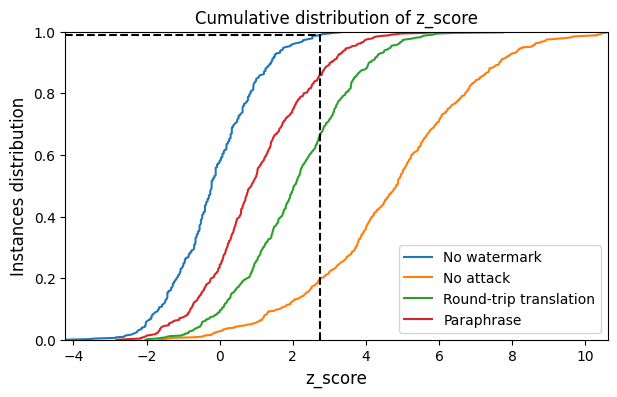

99th percentile of false instances: 2.7451971595209947
Number of detected instances in kirchenbauer_c4_detection.json: 5 or 0.9765625 %
Number of detected instances in kirchenbauer_no_attack_detection.json: 410 or 80.078125 %
Number of detected instances in kirchenbauer_backtranslated_detection.json: 171 or 33.3984375 %
Number of detected instances in kirchenbauer_paraphrase_detection.json: 72 or 14.0625 %


2.7451971595209947

In [35]:
plot_distribution(["kirchenbauer_c4_detection.json", "kirchenbauer_no_attack_detection.json", "kirchenbauer_backtranslated_detection.json", "kirchenbauer_paraphrase_detection.json"], "z_score")

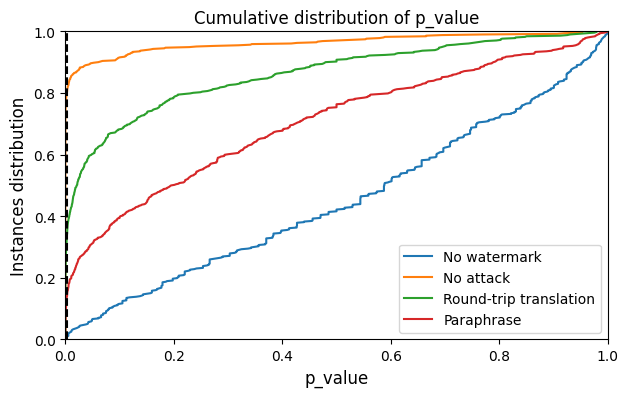

1st percentile of false instances: 0.0030294234791454332
Number of detected instances in kirchenbauer_c4_detection.json: 5 or 0.9765625 %
Number of detected instances in kirchenbauer_no_attack_detection.json: 410 or 80.078125 %
Number of detected instances in kirchenbauer_backtranslated_detection.json: 171 or 33.3984375 %
Number of detected instances in kirchenbauer_paraphrase_detection.json: 72 or 14.0625 %


0.0030294234791454332

In [36]:
plot_distribution(["kirchenbauer_c4_detection.json", "kirchenbauer_no_attack_detection.json", "kirchenbauer_backtranslated_detection.json", "kirchenbauer_paraphrase_detection.json"], "p_value")

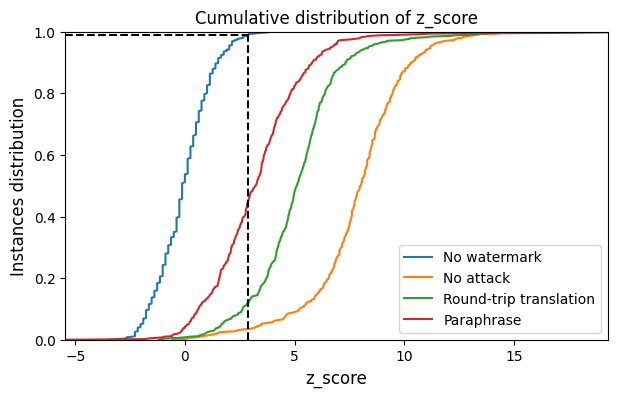

99th percentile of false instances: 2.8805272873575296
Number of detected instances in zhao_c4_detection.json: 5 or 0.9765625 %
Number of detected instances in zhao_no_attack_detection.json: 494 or 96.484375 %
Number of detected instances in zhao_backtranslated_detection.json: 450 or 87.890625 %
Number of detected instances in zhao_paraphrase_detection.json: 283 or 55.2734375 %


2.8805272873575296

In [37]:
plot_distribution(["zhao_c4_detection.json", "zhao_no_attack_detection.json", "zhao_backtranslated_detection.json", "zhao_paraphrase_detection.json"], "z_score")

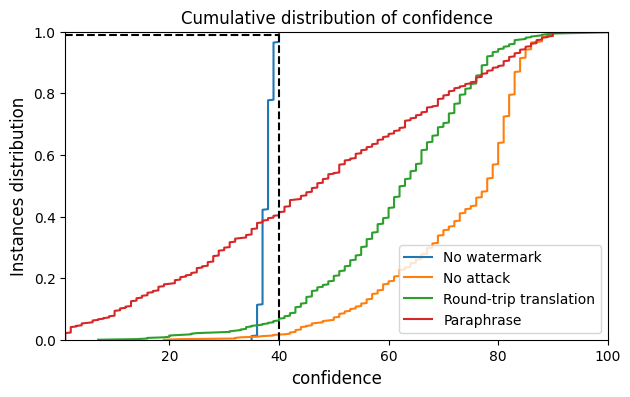

99th percentile of false instances: 40.0
Number of detected instances in wang_c4_detection.json: 0 or 0.0 %
Number of detected instances in wang_no_attack_detection.json: 503 or 98.2421875 %
Number of detected instances in wang_backtranslated_detection.json: 476 or 92.96875 %
Number of detected instances in wang_paraphrase_detection.json: 299 or 58.3984375 %


40.0

In [38]:
plot_distribution(["wang_c4_detection.json", "wang_no_attack_detection.json", "wang_backtranslated_detection.json", "wang_paraphrase_detection.json"], "confidence")

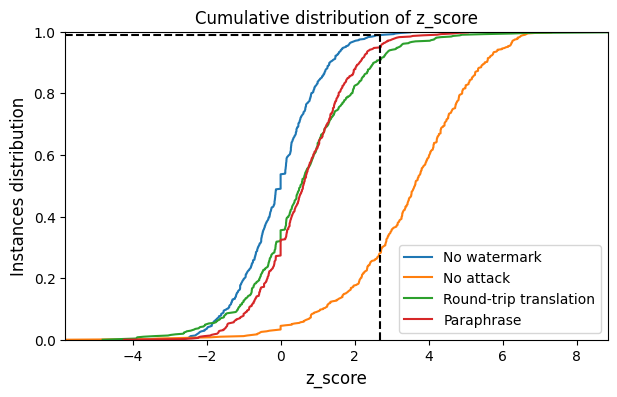

99th percentile of false instances: 2.685966113661637
Number of detected instances in yang_c4_detection.json: 5 or 0.9765625 %
Number of detected instances in opt_yang_no_attack_detection.json: 368 or 71.875 %
Number of detected instances in opt_yang_backtranslated_detection.json: 46 or 8.984375 %
Number of detected instances in opt_yang_paraphrase_detection.json: 26 or 5.078125 %


2.685966113661637

In [48]:
plot_distribution(["yang_c4_detection.json", "opt_yang_no_attack_detection.json", "opt_yang_backtranslated_detection.json", "opt_yang_paraphrase_detection.json"], "z_score")

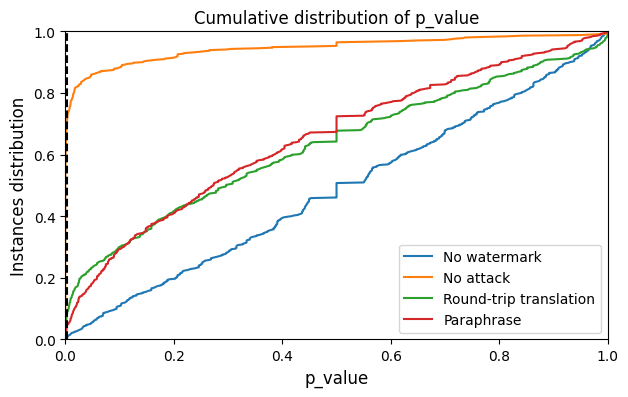

1st percentile of false instances: 0.0037737503261652504
Number of detected instances in yang_c4_detection.json: 5 or 0.9765625 %
Number of detected instances in opt_yang_no_attack_detection.json: 368 or 71.875 %
Number of detected instances in opt_yang_backtranslated_detection.json: 47 or 9.1796875 %
Number of detected instances in opt_yang_paraphrase_detection.json: 26 or 5.078125 %


0.0037737503261652504

In [40]:
plot_distribution(["yang_c4_detection.json", "opt_yang_no_attack_detection.json", "opt_yang_backtranslated_detection.json", "opt_yang_paraphrase_detection.json"], "p_value")

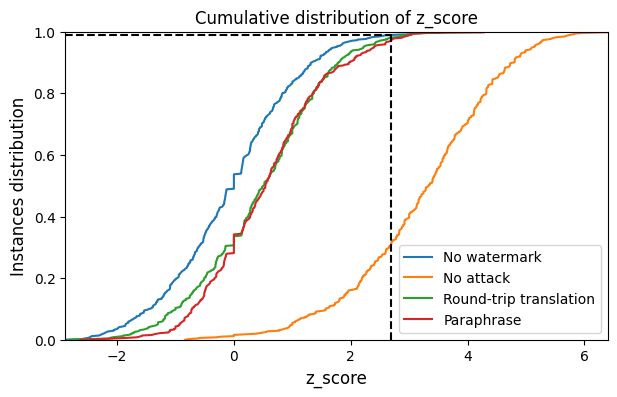

99th percentile of false instances: 2.685966113661637
Number of detected instances in yang_c4_detection.json: 5 or 0.9765625 %
Number of detected instances in llama_yang_no_attack_detection.json: 355 or 69.3359375 %
Number of detected instances in llama_yang_backtranslated_detection.json: 9 or 1.7578125 %
Number of detected instances in llama_yang_paraphrase_detection.json: 14 or 2.734375 %


2.685966113661637

In [41]:
plot_distribution(["yang_c4_detection.json", "llama_yang_no_attack_detection.json", "llama_yang_backtranslated_detection.json", "llama_yang_paraphrase_detection.json"], "z_score")

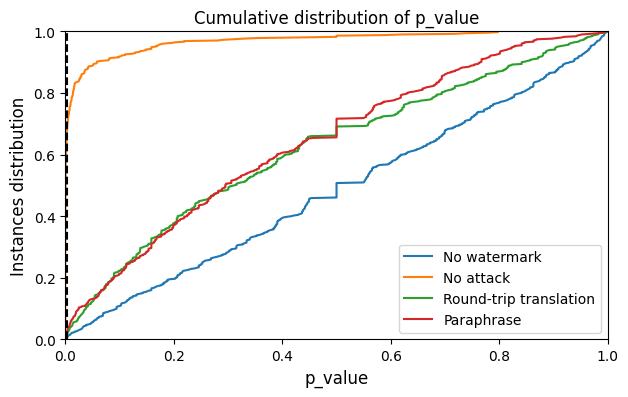

1st percentile of false instances: 0.0037737503261652504
Number of detected instances in yang_c4_detection.json: 5 or 0.9765625 %
Number of detected instances in llama_yang_no_attack_detection.json: 355 or 69.3359375 %
Number of detected instances in llama_yang_backtranslated_detection.json: 9 or 1.7578125 %
Number of detected instances in llama_yang_paraphrase_detection.json: 16 or 3.125 %


0.0037737503261652504

In [42]:
plot_distribution(["yang_c4_detection.json", "llama_yang_no_attack_detection.json", "llama_yang_backtranslated_detection.json", "llama_yang_paraphrase_detection.json"], "p_value")

In [43]:
from scipy.stats import norm
print("Yang's default threshold for z_value is", norm.ppf(1 - 0.05, loc=0, scale=1))

Yang's default threshold for z_value is 1.6448536269514722


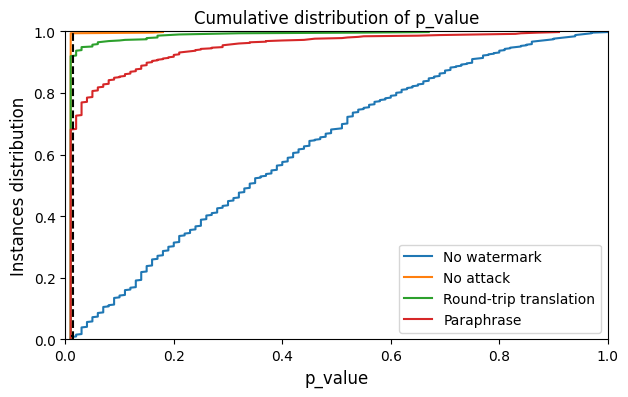

1st percentile of false instances: 0.015
Number of detected instances in kuditipudi_c4_detection.json: 5 or 0.9765625 %
Number of detected instances in kuditipudi_no_attack_detection.json: 510 or 99.609375 %
Number of detected instances in kuditipudi_backtranslated_detection.json: 472 or 92.1875 %
Number of detected instances in kuditipudi_paraphrase_detection.json: 350 or 68.359375 %


0.015

In [56]:
plot_distribution(["kuditipudi_c4_detection.json", "kuditipudi_no_attack_detection.json", "kuditipudi_backtranslated_detection.json", "kuditipudi_paraphrase_detection.json"], "p_value")